# Notebook Imports and Packages

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function
## $f(x) = x^2 + x + 1$

In [2]:
def f(x): 
    return x**2 + x + 1

In [3]:
x_1 = np.linspace(start=-3,stop=3, num=100)

In [4]:
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

Text(0, 0.5, 'f(x)')

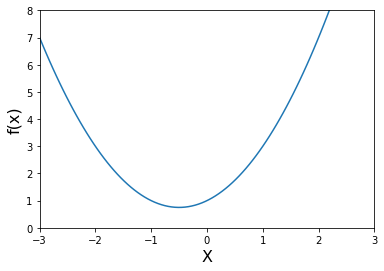

In [5]:
plt.plot(x_1, f(x_1))
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

## Slope & Derivatives

In [6]:
def df(x):
    return 2*x + 1

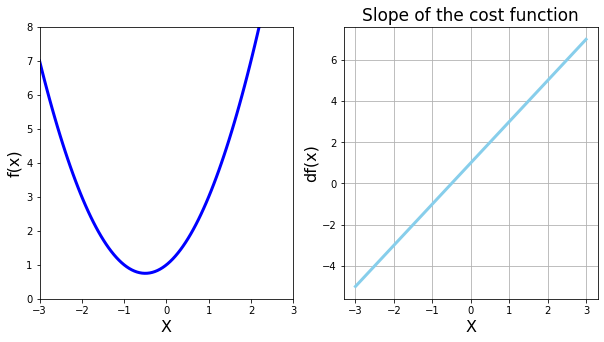

In [7]:
# Plot function and derivative side by side

plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_1, f(x_1), color="blue", linewidth=3)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.title("Slope of the cost function", fontsize=17)
plt.grid()

# Python Loops & Gradient Descent

In [8]:
new_x = 3
step_multiplier = 0.1
x_list = []
slope_list = []
for n in range(30):
    x_list.append(new_x)
    gradient = df(new_x)
    slope_list.append(gradient)
    new_x = new_x - step_multiplier * gradient

print("Local minimum is at: {}".format(new_x))
print("Slope of df(x) value at this point is: {}".format(df(new_x)))
print("f(x) value or cost at this point is: {}".format(f(new_x)))

Local minimum is at: -0.4956672098625011
Slope of df(x) value at this point is: 0.008665580274997753
f(x) value or cost at this point is: 0.7500187730703756


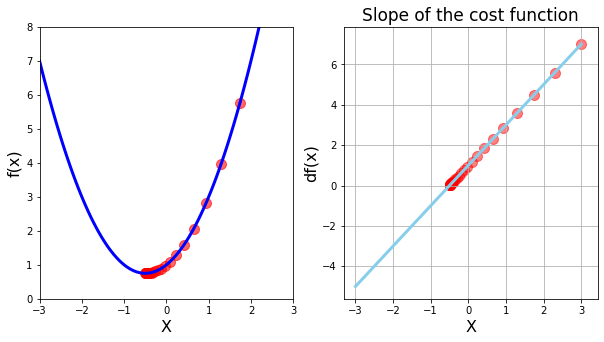

In [9]:
# Plot function and derivative side by side

plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_1, f(x_1), color="blue", linewidth=3)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.title("Slope of the cost function", fontsize=17)
plt.scatter(x_list, slope_list, color="red", s=100, alpha=0.5)
plt.grid()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
# Make some data
x_2 = np.linspace(-2,2,1000)

# Challenge: Write the g(x) function and the dg(X) function in Python

def g(x): 
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

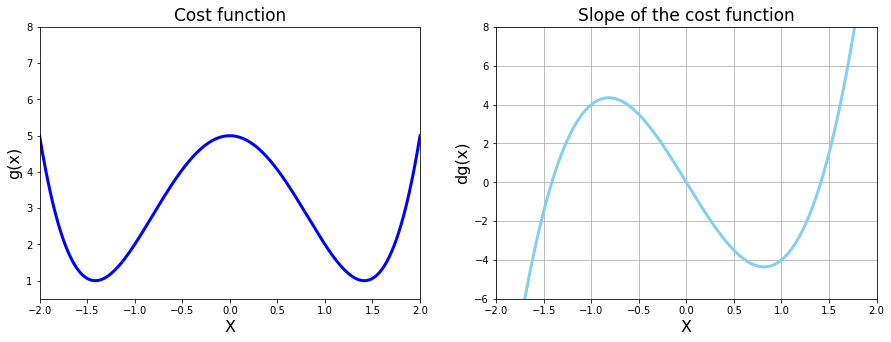

In [11]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.xlim([-2,2])
plt.ylim([0.5,8])
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

values = np.array(x_list)
#plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title("Slope of the cost function", fontsize=17)
#plt.scatter(x_list, slope_list, color="red", s=100, alpha=0.5)
plt.grid()

In [49]:
# Gradient Descent
def gradient_descent(derivative_func, initial_guess,multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    previous_x = 0
    x_list = []
    slope_list = []
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        step_size = abs(new_x - previous_x)
        # print(step_size)
        if step_size < precision:
            #print("Loop ran this many times: {}".format(n))
            break

    #print("Local minimum is at: {}".format(new_x))
    #print("Slope of df(x) value at this point is: {}".format(df(new_x)))
    #print("f(x) value or cost at this point is: {}".format(f(new_x)))
    return new_x, x_list, slope_list

In [41]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=0,multiplier=0.02, precision=0.001)

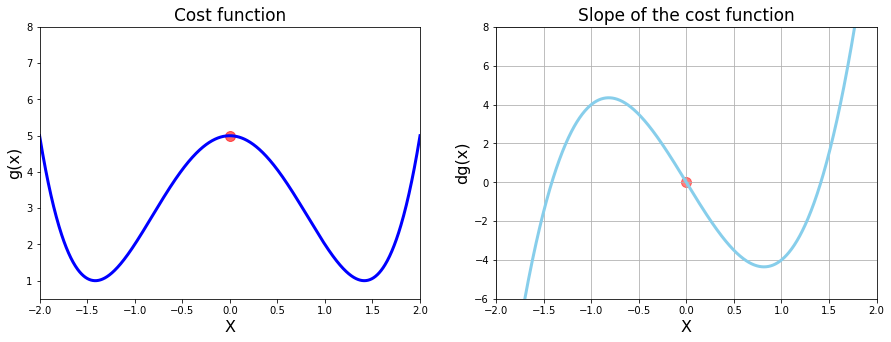

In [42]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.xlim([-2,2])
plt.ylim([0.5,8])
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

values = np.array(x_list)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title("Slope of the cost function", fontsize=17)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)
plt.grid()

# Example 3 - Divergence, Overflow and Python Tuples
## $$ h(x) = x^5 - 2x^4 + 2$$

In [43]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5,num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x): 
    return 5*x**4 - 8*x**3

Local min occurst at: -2071072.4470816324
Cost at this minimum is: -3.810455326061589e+31
Number of steps: 70


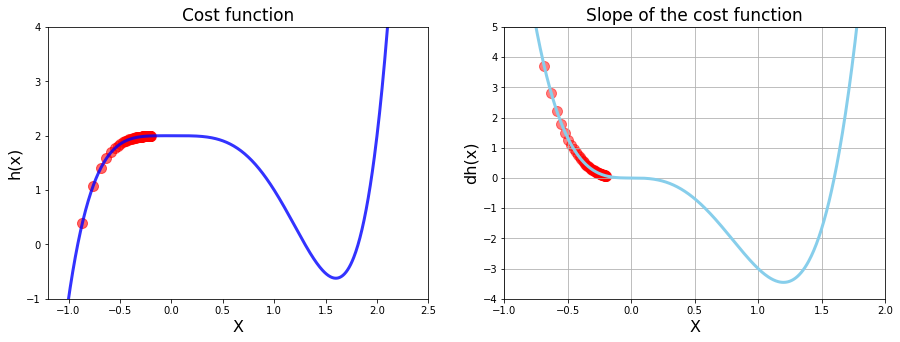

In [53]:
# Plot function and derivative side by side
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh,initial_guess=-0.2, max_iter=70)
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
# 1 Chart: Cost Function
plt.plot(x_3, h(x_3), color="blue", linewidth=3, alpha=0.8)
plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)

#values = np.array(list_x)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_3, dh(x_3), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.title("Slope of the cost function", fontsize=17)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)
plt.grid()

print("Local min occurst at: {}".format(local_min))
print("Cost at this minimum is: {}".format(h(local_min)))
print("Number of steps: {}".format(len(list_x)))

In [56]:
import sys
#help(sys)
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

# Python Tuples

In [57]:
# Creating a tuple
breakfast = "bacon","eggs","avocado"
unlucky_numbers = 13,4,9,26,17

print("I love {}".format(breakfast[0]))

I lovebacon


In [58]:
tuple_with_single_value=1,
type(tuple_with_single_value)

tuple